In [1]:
import numpy as np, basic, prjlib, plottools as pl
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import matplotlib.ticker

In [2]:
Tcmb = 2.72e6
params = {
    'figure.figsize':[5,5],
    'axes.labelsize': 16,
    'legend.fontsize': 18,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'text.usetex': True,
    'font.family': "Times New Roman", 
    }
plt.rcParams.update(params)

In [3]:
p = {}
lsamax = 1500
TT, EE, BB, TN, EN, BN = {}, {}, {}, {}, {}, {}
for t, lmax in [('sa',lsamax),('la',4096)]:
    for ntype in ['base','goal']:
        p[t+ntype] = prjlib.analysis_init(t=t,freq='com',ntype=ntype+'_roll50')
        print('loading from',p[t+ntype].fcmb.scl['o'])
        l, TT[t+ntype], EE[t+ntype], BB[t+ntype] = np.loadtxt(p[t+ntype].fcmb.scl['s'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
        l, TN[t+ntype], EN[t+ntype], BN[t+ntype] = np.loadtxt(p[t+ntype].fcmb.scl['n'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
L = np.linspace(0,lsamax,lsamax+1)
s = l*(l+1.)*Tcmb**2/2./np.pi
S = L*(L+1.)*Tcmb**2/2./np.pi

loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sacom_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sacom_goal_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/lacom_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/lacom_goal_roll50_mv3_a5.0deg_none_o.dat


Temperature

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


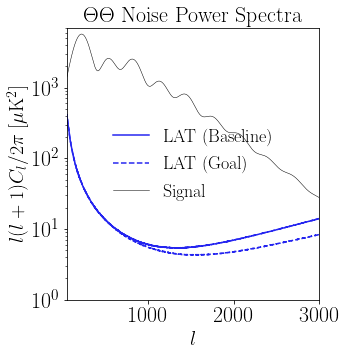

In [4]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(50,3000)
ax.set_ylim(1,7e3)
ax.set_yscale('log')
ax.set_xlabel(r'$l$',fontsize=20)
ax.set_ylabel(r'$l(l+1)C_l/2\pi$ [$\mu$K$^2$]',fontsize=20)
plt.gcf().subplots_adjust(left=0.2)
co = rcParams['axes.prop_cycle'].by_key()['color']
plot(l,s*TN['labase'],color=co[0],label='LAT (Baseline)')
plot(l,s*TN['lagoal'],color=co[0],ls='--',label='LAT (Goal)')
plot(l,s*p['labase'].lTT[:lmax+1],'k-',lw=.5,label='Signal')
title('$\Theta\Theta$ Noise Power Spectra',fontsize=22)
legend(loc=0)
savefig('fig_cmb_TT.pdf')

Polarization

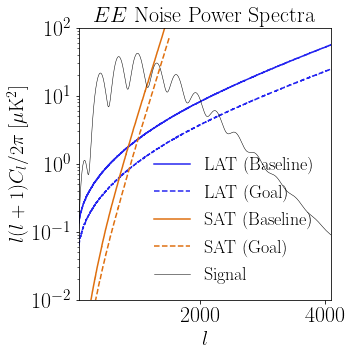

In [5]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(50,4096)
ax.set_ylim(1e-2,1e2)
ax.set_yscale('log')
ax.set_xlabel(r'$l$',fontsize=20)
ax.set_ylabel(r'$l(l+1)C_l/2\pi$ [$\mu$K$^2$]',fontsize=20)
plt.gcf().subplots_adjust(left=0.2)
#pl.plot_1dstyle(xmin=50,xmax=4096,ymin=1e-2,ymax=1e2,**fig_kwargs)
plot(l,s*EN['labase'],color=co[0],label='LAT (Baseline)')
plot(l,s*EN['lagoal'],color=co[0],ls='--',label='LAT (Goal)')
plot(L,S*EN['sabase'],color=co[1],label='SAT (Baseline)')
plot(L,S*EN['sagoal'],color=co[1],ls='--',label='SAT (Goal)')
plot(l,s*p['labase'].lEE[:lmax+1],'k-',lw=.5,label='Signal')
title(r'$EE$ Noise Power Spectra',fontsize=22)
legend(loc=0)
savefig('fig_cmb_EE.pdf')

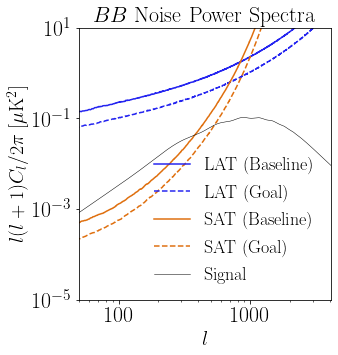

In [6]:
# BB + noise
fig, ax = plt.subplots(1, 1)
ax.set_xlim(50,4096)
ax.set_ylim(1e-5,1e1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$l$',fontsize=20)
ax.set_ylabel(r'$l(l+1)C_l/2\pi$ [$\mu$K$^2$]',fontsize=20)
plt.gcf().subplots_adjust(left=0.2)
#pl.plot_1dstyle(xmin=50,xmax=4096,xlog=True,ymin=1e-3,ymax=5e1,**fig_kwargs)
plot(l,s*BN['labase'],color=co[0],label='LAT (Baseline)')
plot(l,s*BN['lagoal'],color=co[0],ls='--',label='LAT (Goal)')
plot(L,S*BN['sabase'],color=co[1],label='SAT (Baseline)')
plot(L,S*BN['sagoal'],color=co[1],ls='--',label='SAT (Goal)')
plot(l,s*p['labase'].lBB[:lmax+1],'k-',lw=.5,label='Signal')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
title(r'$BB$ Noise Power Spectra',fontsize=22)
legend(loc=4)
savefig('fig_cmb_BB.pdf')